In [35]:
import pandas as pd
import sqlite3
import plotly.express as px

In [3]:
conn = sqlite3.connect('Data/finalproject.db')
query = """
select * from gym_locations

"""



health = pd.read_sql(query, conn, index_col = 'index')

In [4]:
health

,cc,state,city,zip,a1,abbr,State_ID_fk
index,,,,,,,
0,US,RI,Pawtucket,02860,50 Ann Mary St,RI,44
1,US,RI,Warwick,02888,1222 Warwick Ave,RI,44
2,US,RI,Woonsocket,02895,1500 Diamond Hill Rd,RI,44
3,US,RI,East Providence,02914,585 Taunton Ave,RI,44
4,US,RI,Cumberland,02864,1800 Mendon Rd,RI,44
...,...,...,...,...,...,...,...
2369,US,MT,Helena,59601,3035 N Sanders St,MT,30
2370,US,MT,Missoula,59808,2640 N Reserve St,MT,30
2371,US,MT,Great Falls,59405,726 10th Ave S,MT,30


In [97]:
query = """
select * from health
"""

In [98]:
health = pd.read_sql(query, conn, index_col = 'index')

In [100]:
health.stratificationcategoryid1.unique()

array(['AGEYR', 'EDU', 'INC', 'RACE', 'GEN', 'OVR'], dtype=object)

In [13]:
query = """
select gym_locations.abbr,gym_locations.State_ID_fk, weight_condition.* from gym_locations
JOIN weight_condition ON weight_condition.State_ID_fk = gym_locations.State_ID_fk
"""
pd.read_sql(query,con=conn)

,abbr,State_ID_fk,index,yearstart,yearend,locationabbr,locationdesc,datasource,class,topic,...,stratificationid1,education,income,race_ethnicity,gender,data_value_footnote_symbol,data_value_footnote,total,abbr,State_ID_fk
0,RI,44,1372,2021,2021,RI,Rhode Island,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,...,AGEYR5564,None,None,None,None,None,None,None,RI,44
1,RI,44,1373,2021,2021,RI,Rhode Island,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,...,EDUCOGRAD,College graduate,None,None,None,None,None,None,RI,44
2,RI,44,1374,2021,2021,RI,Rhode Island,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,...,RACENAA,None,None,American Indian/Alaska Native,None,~,Data not available because sample size is insu...,None,RI,44
3,RI,44,1375,2021,2021,RI,Rhode Island,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,...,RACEWHT,None,None,Non-Hispanic White,None,None,None,None,RI,44
4,RI,44,1376,2021,2021,RI,Rhode Island,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,...,AGEYR4554,None,None,None,None,None,None,None,RI,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66467,MT,30,443,2021,2021,MT,Montana,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,...,INCLESS15,None,"Less than $15,000",None,None,None,None,None,MT,30
66468,MT,30,444,2021,2021,MT,Montana,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,...,EDUCOTEC,Some college or technical school,None,None,None,None,None,None,MT,30
66469,MT,30,445,2021,2021,MT,Montana,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,...,AGEYR4554,None,None,None,None,None,None,None,MT,30
66470,MT,30,446,2021,2021,MT,Montana,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,...,RACEHPI,None,None,Hawaiian/Pacific Islander,None,~,Data not available because sample size is insu...,None,MT,30


In [81]:
query = """
SELECT gyms.*,
    weight_condition.abbr,
    weight_condition.locationdesc,
    weight_condition.data_value AS obesity_data,
    leisure.data_value AS leisure_data,
    leisure.stratificationcategoryid1,
    leisure.stratificationid1,
    states.*
    FROM (SELECT COUNT(gym_locations.abbr) AS n_gyms,gym_locations.State_ID_fk FROM gym_locations
GROUP BY State_ID_fk) as gyms
JOIN weight_condition ON weight_condition.State_ID_fk = gyms.State_ID_fk
AND weight_condition.stratificationcategoryid1 = 'OVR'
JOIN leisure ON leisure.State_ID_fk = gyms.State_ID_fk
AND leisure.stratificationcategoryid1 = 'OVR'
JOIN states ON states.State_ID_fk = gyms.State_ID_fk
"""
df = pd.read_sql(query,con=conn)

In [82]:
df.dtypes
df['obesity_data'] = df['obesity_data'].astype(float)
df['leisure_data'] = df['leisure_data'].astype(float)
df['Pop'] = df['Pop'].astype(int)
df['gyms_per_100k'] = df['n_gyms']/(df['Pop']/100000)

In [83]:
df

,n_gyms,State_ID_fk,abbr,locationdesc,obesity_data,leisure_data,stratificationcategoryid1,stratificationid1,index,Name,Pop,State_ID_fk,abbr,gyms_per_100k
0,20,33,NH,New Hampshire,35.4,20.0,OVR,OVERALL,5,New Hampshire,1359711,33,NH,1.470901
1,3,46,SD,South Dakota,33.7,23.2,OVR,OVERALL,17,South Dakota,884659,46,SD,0.339114
2,4,56,WY,Wyoming,37.0,22.9,OVR,OVERALL,26,Wyoming,578759,56,WY,0.691134
3,137,36,NY,New York,34.5,25.8,OVR,OVERALL,8,New York,19453561,36,NY,0.704241
4,24,41,OR,Oregon,34.7,19.9,OVR,OVERALL,13,Oregon,4217737,41,OR,0.569026
5,38,01,AL,Alabama,31.9,31.5,OVR,OVERALL,28,Alabama,4903185,01,AL,0.775006
6,3,11,DC,District of Columbia,30.7,15.8,OVR,OVERALL,35,District of Columbia,705749,11,DC,0.425080
7,4,38,ND,North Dakota,34.8,25.5,OVR,OVERALL,10,North Dakota,762062,38,ND,0.524892
8,156,12,FL,Florida,NaN,NaN,OVR,OVERALL,37,Florida,21477737,12,FL,0.726334
9,173,48,TX,Texas,33.7,25.1,OVR,OVERALL,19,Texas,28995881,48,TX,0.596636


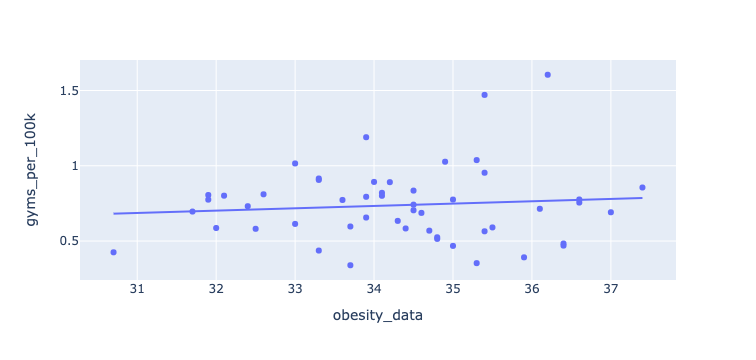

In [88]:
px.scatter(df, y = 'gyms_per_100k', x = 'obesity_data', trendline = 'ols')

In [101]:
query = """
SELECT gyms.*,
    weight_condition.abbr,
    weight_condition.locationdesc,
    weight_condition.data_value AS obesity_data,
    weight_condition.stratificationcategoryid1,
    weight_condition.stratificationid1,
    states.*
    FROM (SELECT COUNT(gym_locations.abbr) AS n_gyms,gym_locations.State_ID_fk FROM gym_locations
GROUP BY State_ID_fk) as gyms
JOIN weight_condition ON weight_condition.State_ID_fk = gyms.State_ID_fk
AND weight_condition.stratificationcategoryid1 = 'AGEYR'
JOIN states ON states.State_ID_fk = gyms.State_ID_fk
"""
agedf = pd.read_sql(query,con=conn)

agedf.dtypes
agedf['obesity_data'] = agedf['obesity_data'].astype(float)
agedf['Pop'] = agedf['Pop'].astype(int)
agedf['gyms_per_100k'] = agedf['n_gyms']/(agedf['Pop']/100000)

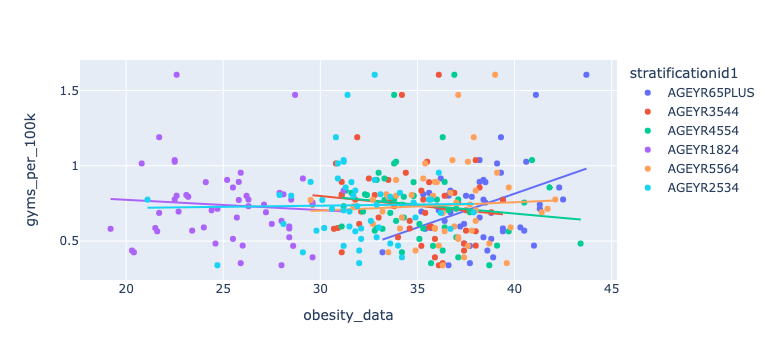

In [102]:
px.scatter(agedf, y = 'gyms_per_100k', x = 'obesity_data', trendline = 'ols', color = 'stratificationid1')

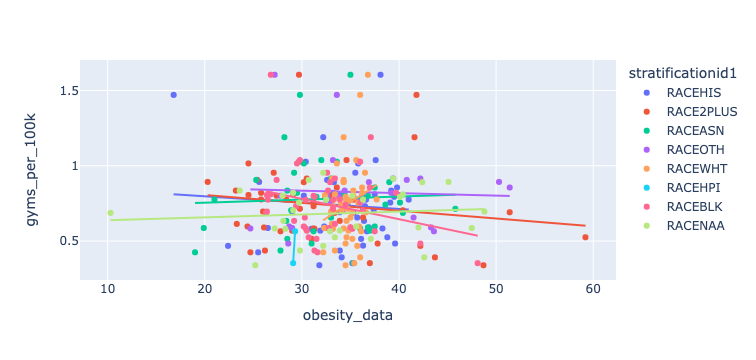

In [109]:
query = """
SELECT gyms.*,
    weight_condition.abbr,
    weight_condition.locationdesc,
    weight_condition.data_value AS obesity_data,
    weight_condition.stratificationcategoryid1,
    weight_condition.stratificationid1,
    states.*
    FROM (SELECT COUNT(gym_locations.abbr) AS n_gyms,gym_locations.State_ID_fk FROM gym_locations
GROUP BY State_ID_fk) as gyms
JOIN weight_condition ON weight_condition.State_ID_fk = gyms.State_ID_fk
AND weight_condition.stratificationcategoryid1 = 'RACE'
JOIN states ON states.State_ID_fk = gyms.State_ID_fk
"""
agedf = pd.read_sql(query,con=conn)

agedf.dtypes
agedf['obesity_data'] = agedf['obesity_data'].astype(float)
agedf['Pop'] = agedf['Pop'].astype(int)
agedf['gyms_per_100k'] = agedf['n_gyms']/(agedf['Pop']/100000)

px.scatter(agedf, y = 'gyms_per_100k', x = 'obesity_data', trendline = 'ols', color = 'stratificationid1')

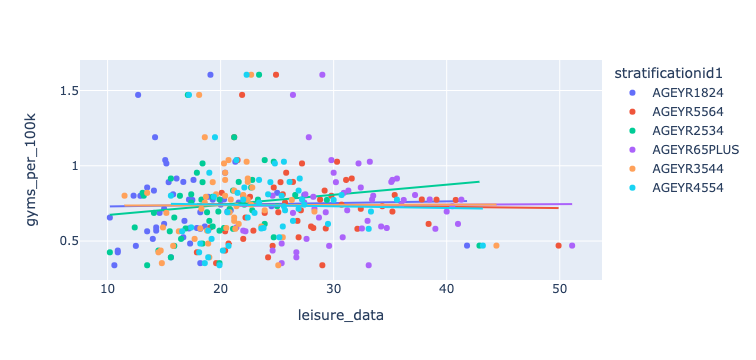

In [110]:
query = """
SELECT gyms.*,
    leisure.abbr,
    leisure.locationdesc,
    leisure.data_value AS leisure_data,
    leisure.stratificationcategoryid1,
    leisure.stratificationid1,
    states.*
    FROM (SELECT COUNT(gym_locations.abbr) AS n_gyms,gym_locations.State_ID_fk FROM gym_locations
GROUP BY State_ID_fk) as gyms
JOIN leisure ON leisure.State_ID_fk = gyms.State_ID_fk
AND leisure.stratificationcategoryid1 = 'AGEYR'
JOIN states ON states.State_ID_fk = gyms.State_ID_fk
"""
leis = pd.read_sql(query,con=conn)

leis.dtypes
leis['leisure_data'] = leis['leisure_data'].astype(float)
leis['Pop'] = leis['Pop'].astype(int)
leis['gyms_per_100k'] = leis['n_gyms']/(leis['Pop']/100000)

px.scatter(leis, y = 'gyms_per_100k', x = 'leisure_data', trendline = 'ols', color = 'stratificationid1')

In [111]:
agedf.to_csv('obesity_plotdata.csv', index = False)
leis.to_csv('leisure_plotdata.csv', index = False)